In [1]:
# Libraries import
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
from sklearn.mixture import GaussianMixture

warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 12.0
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('MSFT.csv', error_bad_lines=False,encoding= 'unicode_escape')
df

,Date,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),S_Close(t-3),S_Close(t-5),S_Open(t-1),MA5,MA10,MA20,MA50,MA200,EMA10,EMA20,EMA50,EMA100,EMA200,MACD,MACD_EMA,ATR,ADX,CCI,ROC,RSI,William%R,SO%K,STD5,ForceIndex1,ForceIndex20,Date_col,Day,DayofWeek,DayofYear,Week,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Is_leap_year,Year,Month,QQQ_Close,QQQ(t-1),QQQ(t-2),QQQ(t-5),QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
0,2005-10-17,17.97,17.98,17.80,17.86,46924400,0.384549,19.023098,17.484902,17.97,17.91,17.70,17.81,17.99,17.844,17.911,18.2540,19.0262,18.58480,17.891061,17.891061,17.891061,17.891061,17.891061,-0.341530,-0.329186,0.271273,40.465948,1333.333333,-3.823371,33.044146,-84.251969,15.748031,0.007260,-5161684.0,-50209108.0,2005-10-17,17,0,290,42,0,0,0,0,0,0,0,2005,10,33.65,33.55,33.30,33.61,33.692,33.9970,34.2690,1190.10,1186.57,1187.33,10348.10,10287.34,10238.76,17.89
1,2005-10-18,17.83,18.08,17.80,17.89,69328200,0.368394,18.944289,17.470711,17.86,17.97,17.91,17.78,17.97,17.866,17.881,18.2075,18.9900,18.57780,17.890708,17.890708,17.890708,17.890708,17.890708,-0.328778,-0.329105,0.271897,39.942915,1333.333333,-1.649258,34.265354,-81.889764,18.110236,0.007153,2079846.0,-64475226.0,2005-10-18,18,1,291,42,0,0,0,0,0,0,0,2005,10,33.42,33.65,33.55,33.44,33.570,33.9525,34.2466,1178.14,1190.10,1184.87,10285.26,10348.10,10253.17,18.27
2,2005-10-19,17.88,18.27,17.84,18.27,66574500,0.359387,18.911774,17.474226,17.89,17.86,17.97,17.70,17.83,17.980,17.911,18.1930,18.9582,18.57230,18.017138,18.017138,18.017138,18.017138,18.017138,-0.284726,-0.320229,0.283190,38.148273,1333.333333,1.669449,47.361696,-50.806452,49.193548,0.010470,25298310.0,-19306605.0,2005-10-19,19,2,292,42,0,0,0,0,0,0,0,2005,10,34.09,33.42,33.65,33.05,33.562,33.9600,34.2330,1195.76,1178.14,1177.68,10414.13,10285.26,10216.91,18.05
3,2005-10-20,18.24,18.30,18.02,18.05,58830600,0.355440,18.883881,17.462119,18.27,17.89,17.86,17.91,17.88,18.008,17.915,18.1730,18.9278,18.56595,18.028092,18.028092,18.028092,18.028092,18.028092,-0.264518,-0.309087,0.282962,36.294267,1333.333333,0.222099,42.128624,-63.888889,36.111111,0.012595,-12942732.0,-23532240.0,2005-10-20,20,3,293,42,0,0,0,0,0,0,0,2005,10,33.77,34.09,33.42,33.30,33.567,33.9455,34.2190,1177.80,1195.76,1176.84,10281.10,10414.13,10216.59,18.05
4,2005-10-21,18.14,18.21,17.89,18.05,69431200,0.352278,18.860056,17.450944,18.05,18.27,17.89,17.97,18.24,18.024,17.929,18.1555,18.8928,18.55970,18.035395,18.035395,18.035395,18.035395,18.035395,-0.245671,-0.296404,0.285607,35.177496,1333.333333,0.781686,42.128624,-53.012048,46.987952,0.012569,0.0,-24300920.0,2005-10-21,21,4,294,42,0,0,0,0,0,0,0,2005,10,33.98,33.77,34.09,33.55,33.586,33.9365,34.2034,1179.59,1177.80,1186.57,10215.22,10281.10,10287.34,18.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3727,2020-08-07,214.85,215.70,210.93,212.48,27789600,4.893286,217.618572,198.045428,216.35,212.94,213.29,205.01,212.34,214.320,209.044,207.8320,201.0002,171.71495,212.673974,212.673974,212.673974,212.673974,212.673974,3.181860,2.765197,5.569604,21.196988,1333.333333,5.553900,56.846318,-25.633383,74.366617,0.030344,-107545752.0,-33069624.0,2020-08-07,7,4,220,32,0,0,0,0,0,0,1,2020,8,271.47,274.64,271.05,265.79,266.054,263.4085,252.2098,3351.28,3349.16,3271.12,27433.48,27386.98,26428.32,208.25
3728,2020-08-10,211.67,211.88,206.35,208.25,36716500,4.890728,217.672456,198.109544,212.48,216.35,212.94,216.54,214.85,212.662,209.484,207.8910,201.5002,172.07610,211.199316,211.199316,211.199316,211.199316,211.199316,2.794806,2.771119,5.609632,20.439443,1333.333333,2.158450,51.646242,-46.646796,53.353204,0.015044,-155310795.0,43325470.0,2020-08-10,10,0,223,33,0,0,0,

In [3]:
df = df.convert_dtypes()
pick_columns = ['MACD', 'ADX', 'Week', 'ROC']
sub_df = df[pick_columns]
sub_df

,MACD,ADX,Week,ROC
0,-0.34153,40.465948,42,-3.823371
1,-0.328778,39.942915,42,-1.649258
2,-0.284726,38.148273,42,1.669449
3,-0.264518,36.294267,42,0.222099
4,-0.245671,35.177496,42,0.781686
...,...,...,...,...
3727,3.18186,21.196988,32,5.5539
3728,2.794806,20.439443,33,2.15845
3729,2.071219,19.042638,33,0.673201
3730,1.944178,18.254498,33,2.513966


#### Estimation of order statisticks (boxplot) with IQR equal to 0.5 and 99.5 quantiles

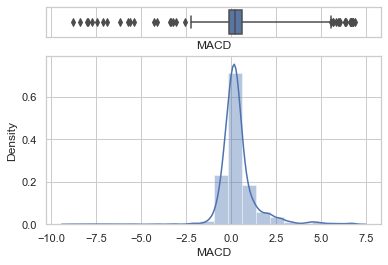

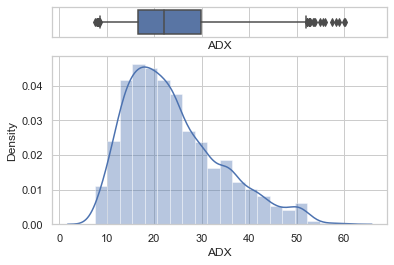

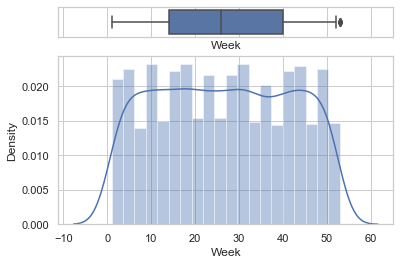

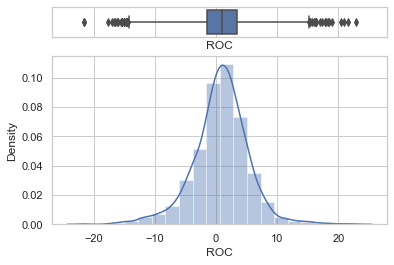

In [14]:
for col in sub_df:
    df_col = sub_df[col]
    sns.set(style="whitegrid") 
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df_col, ax=ax_box, whis=[0.5, 99.5])
    sns.distplot(df_col, ax=ax_hist, bins=20) 
    plt.show()
    

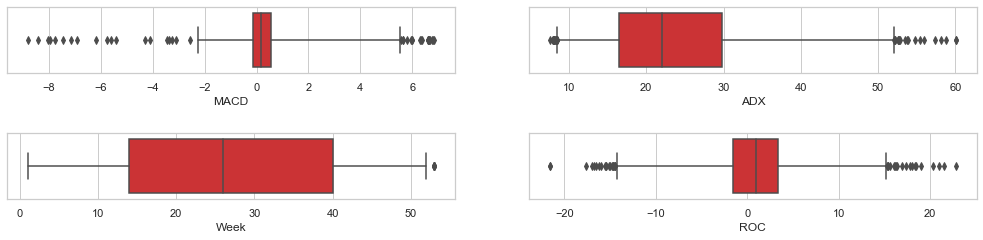

In [15]:
fig, axs = plt.subplots(2, 2, figsize=(15, 4),squeeze=False)
fig.tight_layout(pad=3.0)
axs=axs.flat
for num, col in enumerate(list(sub_df.columns)):
    sns.boxplot(x = col, data = df, ax=axs[num], palette="Set1", whis = [0.5, 99.5])

#### Chi squared test for discrete distribution - for 'Week' column

['randint']
Chi test results 
------------------
Test pvalue: 1.0. Hypophesis for distribution Uniform can be accepted


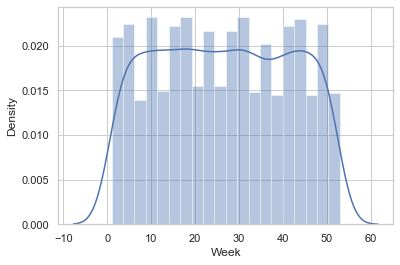

In [57]:
from scipy.stats import chi2_contingency as chi2

def fit_funct(data, var, distr, test = scipy.stats.kstest):
    
    # The distribution parameters are determined using the fit function
    x = np.linspace(np.min(data[var]), np.max(data[var]))
    data_float = np.array(data[var], dtype=float) 
    params = getattr(scipy.stats, distr).fit(data_float)
    ks = test(data_float, distr, params)
    
    return ks

def test_d(data, var, distributions, test = scipy.stats.kstest):
    
    print(f'{var}:')
    for distr in distributions:
        
        ks = fit_funct(data, var, distr, test = test)
        if ks.pvalue > 0.05:
            print(f'Test pvalue: {ks.pvalue}. Hypophesis for distribution {distr} can be accepted')
            
    print('-----------------')

# Obtain all possible continuios distributions
dist_continu = [d for d in dir(scipy.stats) if
                isinstance(getattr(scipy.stats, d), scipy.stats.rv_continuous)]

# Obtain all possible discrete distributions
dis_disc = ['randint']

print(dis_disc)


unwanted = {'kstwo', 'levy_stable', 'studentized_range'}
dist_continu = [item for item in dist_continu if item not in unwanted]

# print("Kstest results \n------------------")
# for var in sub_df:
#     test_d(sub_df, var, dist_continu, test = scipy.stats.kstest)

    
# print('Cramer von Mises test \n----------------')
# for var in sub_df:
#     test_d(sub_df, var, dist_continu, test = scipy.stats.cramervonmises)

print("Chi test results \n------------------")

# Observer frequencies
obs = [h.get_height() for h in sns.distplot(sub_df['Week'], bins=20).patches]
#Expected frequencies
x = np.full(len(obs), 0.2)
val = chi2(obs, x)
print(f'Test pvalue: {val[1]}. Hypophesis for distribution Uniform can be accepted')


#### Estimate and plot disctribution for discrete variables - 'Week'

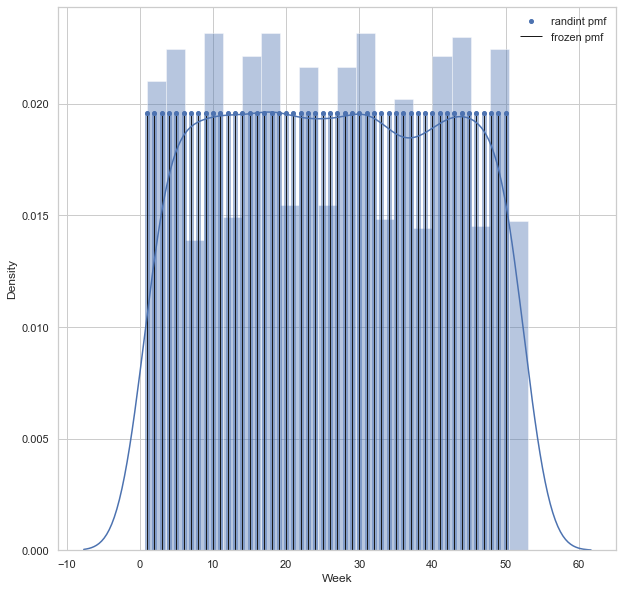

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
low, high = 1, 52
x = np.arange(scipy.stats.randint.ppf(0.01, low, high),
              scipy.stats.randint.ppf(0.99, low, high))

ax.plot(x, scipy.stats.randint.pmf(x, low, high), 'bo', ms=4, label='randint pmf')
ax.vlines(x, 0, scipy.stats.randint.pmf(x, low, high), colors='b', lw=5, alpha=0.5)

rv = scipy.stats.randint(low, high)

sns.distplot(sub_df['Week'], ax=ax, bins=20) 

ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()

Chi test results 
------------------
Test pvalue: 1.0. Hypophesis for distribution Uniform can be accepted


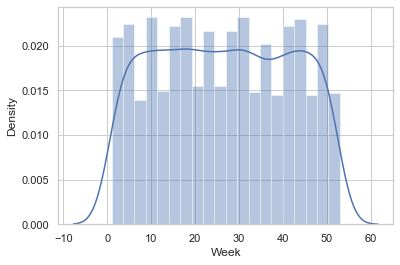

In [76]:
print("Chi test results \n------------------")

# Observer frequencies
obs = [h.get_height() for h in sns.distplot(sub_df['Week'], bins=20).patches]
#Expected frequencies
x = np.full(len(obs), 0.2)
val = chi2(obs, x)
print(f'Test pvalue: {val[1]}. Hypophesis for distribution Uniform can be accepted')